In [1]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt

[ 0.          1.41388891  3.29444449  5.24305562  8.1326389  10.82013894
 14.71666668 19.75625008 25.13125005 32.38750009 40.44930566]


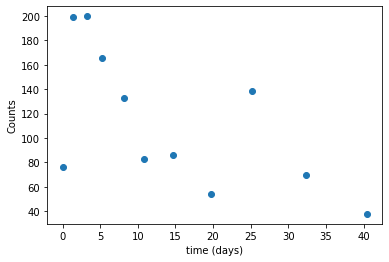

In [2]:
data = np.loadtxt('Snapshots.txt',skiprows=1)

sum_lil,npix_lil,sum_big,npix_big,time = data[:,0],data[:,1],data[:,2],data[:,3],data[:,4] # Data

new_time = time - time[0]
new_time = new_time[0:-1]
print(new_time)

torus = sum_big - sum_lil # Big circle flux minus small circle flux
torus_pix = npix_big - npix_lil # Big circle pixels minus small circle pixels
BG_per_pixel = torus / torus_pix # The background per pixel
Cepheid_corrected = sum_lil - (BG_per_pixel*npix_lil) # The cepheid flux minus the background flux

Cepheid_corrected = Cepheid_corrected[0:-1] # removing the final term because it has too big a time gap

#22.57 = -2.5*np.log10(F) + c
#c = 22.57 + 2.5*np.log10(F) # Calculating c for 1000 counts which gives us 22.57 apparent magnitude
#m = -2.5*np.log10(F)+c # Apparent magnitude equation with constant c, F = counts
#m
#print(star)


plt.scatter(new_time,Cepheid_corrected)
#plt.scatter(time,np.log10(star))
plt.ylabel('Counts')
plt.xlabel('time (days)')
plt.show()

The apparent magnitudes of cepheid 1 are [25.3602023  24.32262449 24.31907246 24.5232521  24.76260409 25.27394472
 25.22772842 25.74099606 24.71543657 25.46580046 26.12530889]

The absolute magnitude of cepheid 1 is -4.781502889463474

The distance to cepheid 1 is 9.692015843117979Mpc


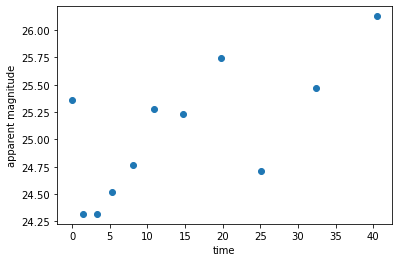

In [10]:
# Pipeline

#Plot counts vs time (with background removed)
#Find the period of the cepheid
#Hubble SpaceTelescope Fine Guidance Sensor Parallaxes of Galactic Cepheid Variable Stars:  Period-Luminosity Relations
#Use above paper for PLR
#Use M =a+b*(logP-1) where a and b values correspond to filter "V", a=-4.05±0.02, b=-2.43±0.12
# m - M = 5log(d/10)
# d=10*10^(m-M/5)

c = 22.57 + 2.5*np.log10(1000) # constant c is for 1000 counts which gives apparent magnitude 22.57
m = -2.5*np.log10(Cepheid_corrected)+c # Apparent magnitude equation with constant c
print("The apparent magnitudes of cepheid 1 are " +str(m) + "\n")

plt.scatter(new_time,m)
plt.xlabel('time')
plt.ylabel('apparent magnitude')

P = 20 # approx period in days

M = -4.05 - 2.43*(np.log10(P)-1)
print("The absolute magnitude of cepheid 1 is " + str(M) + "\n")

# m - M = 5log(d/10)
d = 10*10**((m-M)/5) # Rearranged for d (in pc)
d = np.mean(d) # Mean


#print(d) # In pc

print("The distance to cepheid 1 is " + str(d/1e6) + "Mpc") # In MPc